In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Tratamiento de desbalanceo 
from imblearn.combine import SMOTETomek

#Optimizacion del modelo
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

# Entremamiento de modelos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix


In [178]:
d1 = "C:/Users/muril/OneDrive/Documents/Data Science/Proyecto DS/Microsoft Azure Predictive Maintenance/PdM_telemetry.csv"
d2 = "C:/Users/muril/OneDrive/Documents/Data Science/Proyecto DS/Microsoft Azure Predictive Maintenance/PdM_errors.csv"
d3 = "C:/Users/muril/OneDrive/Documents/Data Science/Proyecto DS/Microsoft Azure Predictive Maintenance/PdM_maint.csv"
d4 = "C:/Users/muril/OneDrive/Documents/Data Science/Proyecto DS/Microsoft Azure Predictive Maintenance/PdM_failures.csv"
d5 = "C:/Users/muril/OneDrive/Documents/Data Science/Proyecto DS/Microsoft Azure Predictive Maintenance/PdM_machines.csv"

In [137]:
telemetry_df = pd.read_csv(d1)
errors_df = pd.read_csv(d2)
maint_df = pd.read_csv(d3)
failures_df = pd.read_csv(d4)
machines_df = pd.read_csv(d5)

# ABSTRACT
Las empresas buscan como aumentar el tiempo de servicio de las maquinas, reducir las paradas inesperadas, reducir costos de mantenimiento, aumentar la eficacia de máquinas individuales o líneas de producción y reducir el backlog (tiempo necesario para realizar el trabajo actual).
Todo esto lleva a la necesidad de encontrar formas más precisa de conocer o predecir el comportamiento futuro de la maquinaria basándose desde la adquisición y análisis de datos e información que se puede obtener a través del monitoreo real y continuo de la condición de trabajo de los equipos. 

Cuando se tiene disponibles datos sobre ciertos parámetros de funcionamiento de las maquinarias,el empleo de modelos de machine learning pueden ayudar a resolver algunos problemas a los que se enfrentan en el tiempo operativo, los gestores de mantenimiento, como ser:

- Existe alguna relacion entre los parametros monitoreados de las maquinas que permita modelar ese efecto?
-	Se podrían configurar alertas sobre comportamiento irregular en la maquinaria captando las variaciones en los valores habituales de los datos que provocan los efectos de una condición de falla inminente.
-	La posibilidad de realizar diagnóstico de tipos de fallas, prevención de las fallas, planificar y gestionar acciones correctivas o de mitigación de tareas de mantenimiento para evitar los eventos de falla.



## Contexto Comercial
La falla de un equipamiento puede implicar el daño de los componentes electrónicos en alguna parte del proceso lo que traería como consecuencia el tener que reciclar el material y volver a empezar el proceso desde el inicio. Adicionalmente a esto, un equipo con falla podría interrumpir otras etapas de los procesos generando atrasos y perdidas superlativas debido a la interrelación de los procesos entre si.


## Problema Comercial
Es de suma importancia que las fallas incipientes en los equipos puedan ser atendidas antes de que se genere la perdida de la función deseada. De aquí, la necesidad de mitigar o reducir la probabilidad de ocurrencia de fallas con el objetivo de minimizar las paradas no planificadas tanto como sea posible

# EDA

A continuacion tenemos una muestra de cada una de las tablas que componen nuestro dataset de estudio

In [18]:
telemetry_df.head(3)

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847


In [19]:
errors_df.head(3)

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5


In [20]:
maint_df.head(3)

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3


In [22]:
failures_df.head(3)

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2


In [41]:
machines_df.head(3)

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8


La 1ra grafica nos ayuda a visualizar que el reemplazo de los componentes de las maquinas esta siguiendo un recambio programado por tiempo(mantenimiento preventivo). Esta deducion surge luego de comparar la 2da grafica que registra las cantidad de componentes reemplazados solo por causa de fallas.
Por ejemplo, el componente 2 ha fallado aproximadamente 250 veces, sin embargo ha sido reemplazado mas de 800 veces.

Text(0.5, 1.0, 'Reemplazo por Falla')

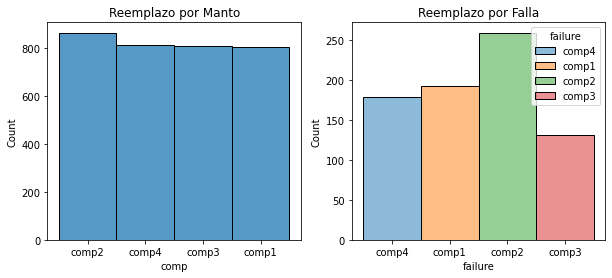

In [54]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize = (10,4))

sns.histplot(data= maint_df, x='comp' , ax=ax[0])
ax[0].set_title('Reemplazo por Manto')
sns.histplot(data= failures_df, x='failure' ,hue='failure', ax=ax[1])
ax[1].set_title('Reemplazo por Falla')


Se realiza la seleccion de una de las maquinas del dataset para poder observar el comportamiento de los parametros de funcionamiento a traves del tiempo

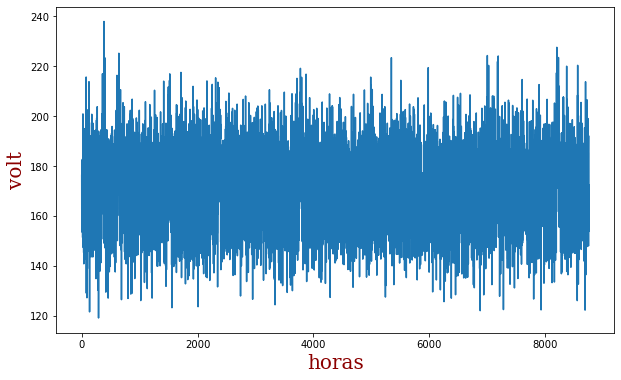

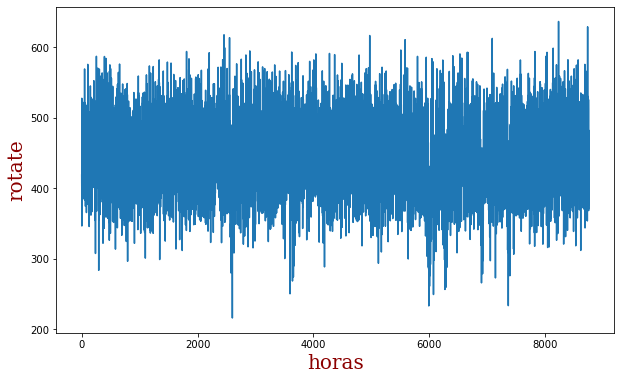

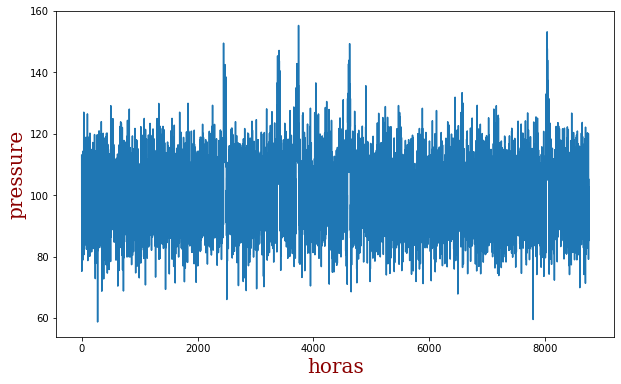

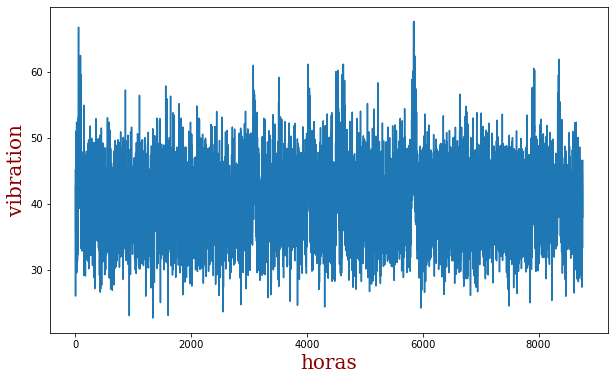

In [4]:
# Paramatros de telemetria para un equipo Machine 7
tele_machine_7=telemetry_df[telemetry_df['machineID']==7]
date_time= range(0,len(tele_machine_7))
for i in range(2,6):
 fig=plt.figure(figsize=(10,6))
 plt.plot(date_time,telemetry_df.iloc[:len(tele_machine_7),i])
 plt.ylabel(telemetry_df.columns[i],fontdict={'family': 'serif','color':  'darkred','weight': 'normal','size': 20})
 plt.xlabel('horas',fontdict={'family': 'serif','color':  'darkred','weight': 'normal','size': 20})

In [5]:
#Funcion para convertir el formato de la fecha de las tablas
tablas = [telemetry_df, maint_df, failures_df, errors_df]
for df in tablas:
    df["datetime"] = pd.to_datetime(df["datetime"], format="%Y-%m-%d %H:%M:%S")

In [6]:
print('El total de registros de telemetria es:' ,telemetry_df.shape)
print('El total de registros de mantenimientos es:',maint_df.shape)
print('El total de registros de fallas es:',failures_df.shape)
print('El total de registros de errores es:',errors_df.shape)

El total de registros de telemetria es: (876100, 6)
El total de registros de mantenimientos es: (3286, 3)
El total de registros de fallas es: (761, 3)
El total de registros de errores es: (3919, 3)


In [8]:
print('Cantidad unica de maquinas:' ,telemetry_df.machineID.nunique())

Cantidad unica de maquinas: 100


Las instancias de los parametros de funcionamiento no presentan valores nulos

In [ ]:
telemetry_df.isna().sum()

datetime     0
machineID    0
volt         0
rotate       0
pressure     0
vibration    0
dtype: int64

Los registros de la tabla telemetry van de enero del 2015 al primer dia del 2016

In [ ]:
# Cual es marco temporal de la data telemetry
telemetry_df.datetime.describe(datetime_is_numeric=True)

count                           676578
mean     2015-07-02 08:04:27.055683328
min                2015-01-01 06:00:00
25%                2015-04-01 16:00:00
50%                2015-07-02 05:00:00
75%                2015-10-01 18:00:00
max                2016-01-01 06:00:00
Name: datetime, dtype: object

En los registros de Mantenimiento se pueden encontrar datos del año 2014

In [ ]:
maint_df.datetime.describe(datetime_is_numeric=True)

count                             3286
mean     2015-05-30 14:40:36.518563840
min                2014-06-01 06:00:00
25%                2015-03-03 06:00:00
50%                2015-06-13 06:00:00
75%                2015-09-18 00:00:00
max                2016-01-01 06:00:00
Name: datetime, dtype: object

In [ ]:
telemetry_df.corr()

,machineID,volt,rotate,pressure,vibration
machineID,1.000000,-0.001037,0.000171,0.005192,-0.000922
volt,-0.001037,1.000000,-0.001511,0.001652,0.002390
rotate,0.000171,-0.001511,1.000000,-0.000688,-0.003056
pressure,0.005192,0.001652,-0.000688,1.000000,0.001395
vibration,-0.000922,0.002390,-0.003056,0.001395,1.000000


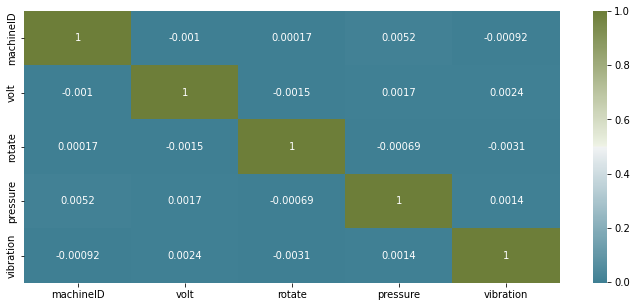

In [7]:
# Graficando la matriz de correlacion
corr0 = telemetry_df.corr()# plot el heatmap
plt.figure(figsize = (12,5))
sns.heatmap(corr0, xticklabels=corr0.columns, yticklabels=corr0.columns, annot=True, cmap=sns.diverging_palette(220, 100, as_cmap=True))

Como se observa en la matriz de correlacion, los valores son muy cercanos a cero, indicando la no dependencia de los parametros estudiados. 

#### Analisis sobre eventos de intervencion de mantenimiento(fallas, errores, mantenimientos)

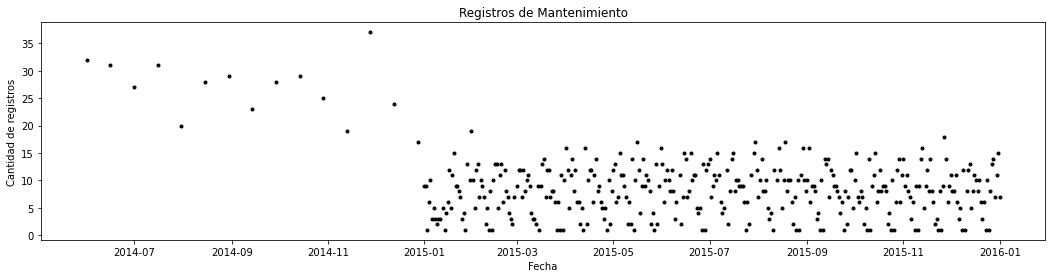

In [51]:
maint_df.datetime.dt.date.value_counts().plot(
    style="k.", 
    figsize=(18, 4), 
    title="Registros de Mantenimiento")
plt.ylabel("Cantidad de registros")
plt.xlabel("Fecha")
plt.show()

Se puede observar como aumentó la frecuencia de las intervenciones de mantenimiento a los equipos durante el año 2015. Sin embargo esto puede deberse a muchos motivos como falta de una politica de registro de las fallas durante el 2014,ausencia de un programa confiable de registro de intervenciones, etc

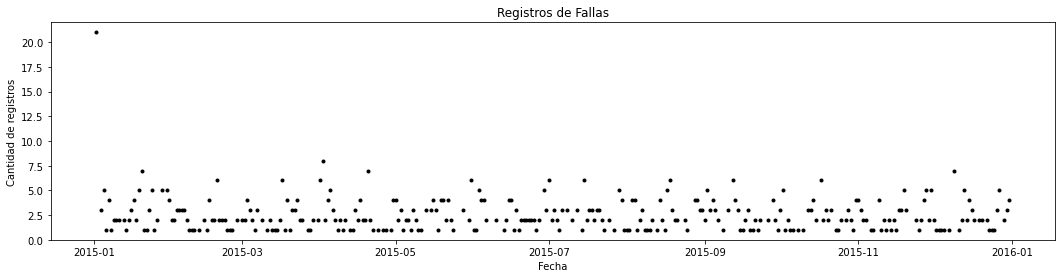

In [52]:
failures_df.datetime.dt.date.value_counts().plot(
    style="k.", 
    figsize=(18, 4), 
    title="Registros de Fallas")
plt.ylabel("Cantidad de registros")
plt.xlabel("Fecha")
plt.show()

Existira alguna relacion entre la cantidad de mantenimiento, cantidad de errores y la edad?

Se unificaran las tablas que contienen la informacion de las maquinas con la informacion de los errores.

In [138]:
# Unir la tabla que contiene la informacion de las maquinas con la informacion de los errores
errores_maq = errors_df.groupby("machineID").size()
errores_maq = pd.DataFrame(errores_maq, columns=['num_errors']).reset_index()
maq_eventos_df = pd.merge(machines_df, errores_maq, how='left', on="machineID")
maq_eventos_df.head(3)

,machineID,model,age,num_errors
0,1,model3,18,35
1,2,model4,7,28
2,3,model3,8,39


In [139]:
# Aca hacemos una union con la tabla de los errores para agregar los registros de mantenimientos
maint_maq = maint_df.groupby("machineID").size()
maint_maq  = pd.DataFrame(maint_maq, columns=["num_maint"]).reset_index()

maq_eventos_df = pd.merge(maq_eventos_df, maint_maq , how='left', on="machineID")
maq_eventos_df.head(3)

,machineID,model,age,num_errors,num_maint
0,1,model3,18,35,37
1,2,model4,7,28,32
2,3,model3,8,39,37


In [140]:
# Agregamos ahora los datos de las fallas para tener toda la info en una sola tabla
fallas_maq = failures_df.groupby("machineID").size()
fallas_maq = pd.DataFrame(fallas_maq, columns=["num_failure"]).reset_index()

maq_eventos_df = pd.merge(maq_eventos_df, fallas_maq, how='left', on="machineID")
maq_eventos_df.head(3)

,machineID,model,age,num_errors,num_maint,num_failure
0,1,model3,18,35,37,7.0
1,2,model4,7,28,32,4.0
2,3,model3,8,39,37,5.0


In [63]:
maq_eventos_df.isnull().sum()

machineID      0
model          0
age            0
num_errors     0
num_maint      0
num_failure    2
dtype: int64

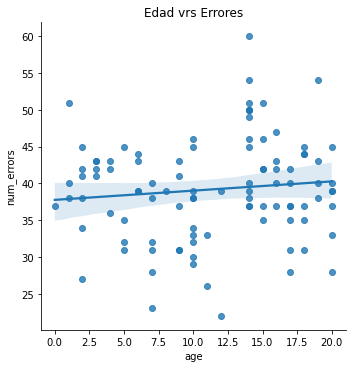

In [141]:
sns.lmplot(x='age', y = 'num_errors', data= maq_eventos_df).set(title='Edad vrs Errores')

No parece existir una dependencia entre la edad de las maquinas y la cantidad de errores que estas generan. Puede indicar esto que las alarmas de error registradas se deban mas a errores en el proceso al cual pertenece la maquina mas que al estado de degradacion de la maquina?

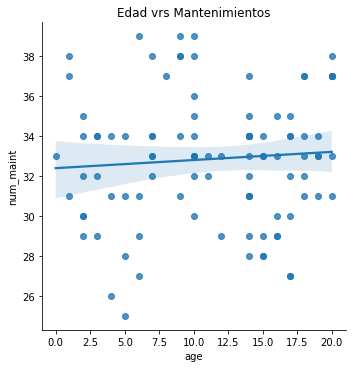

In [64]:
sns.lmplot(x='age', y = 'num_maint', data= maq_eventos_df).set(title='Edad vrs Mantenimientos')

Similar a la grafica anterior (age-errors) aca tampoco se aprecia una correlacion entre las variables estudiadas.

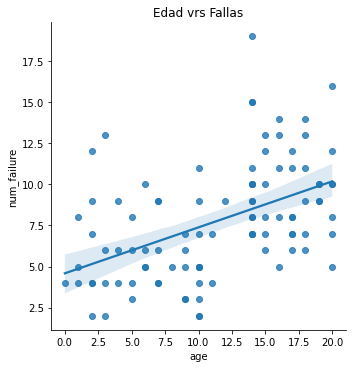

In [66]:
sns.lmplot(x='age', y = 'num_failure', data= maq_eventos_df).set(title='Edad vrs Fallas')

A diferencia de las otras graficas estudiada y talvez como era de esperarse, aca si se puede observar algun tipo de relacion entre la edad de las maquinas y la cantidad de fallas que registran. Sin embargo, tambien se observa valores muy dispersos.

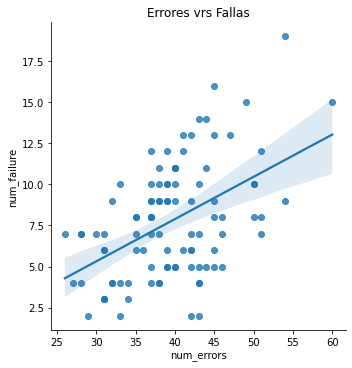

In [67]:
sns.lmplot(x='num_errors', y = 'num_failure', data= maq_eventos_df).set(title='Errores vrs Fallas')

Como lo muestra la grafica, hay alguna correlacion entre la edad y las fallas. Pero tambien se puede observar alguna correlacion entre los eventos de errores y las fallas.

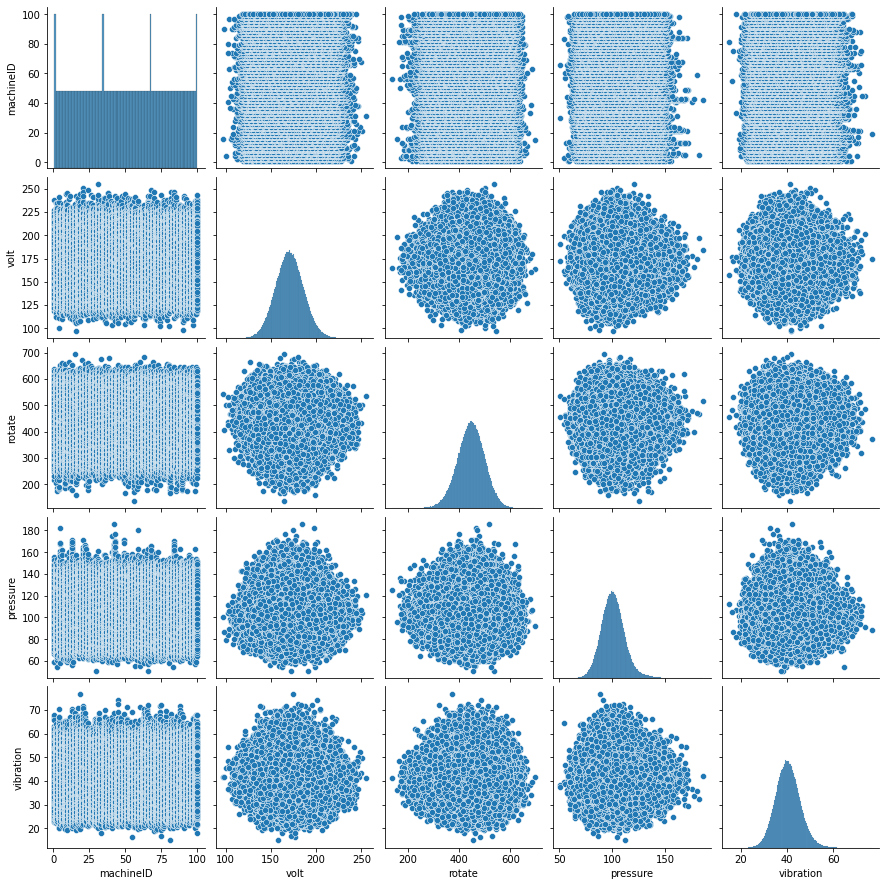

In [ ]:
sns.pairplot (telemetry_df)

En este pairplot se pueden observar como se distribuyen todos los valores de los parametros de funcionamiento registrados. Se pueden observar como algunos parametros muestran algunos valores un poco alejados de la media. Seran estos puntos evidencia de una falla?

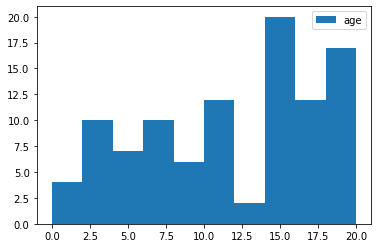

In [ ]:
machines_df['age'].hist(grid=False, legend=True) # Distribucion de la edad de la maquinaria

In [22]:
pd.merge(telemetry_df,failures_df, how = 'inner') # Este dataframe solo incluye las instancias con fallas

,datetime,machineID,volt,rotate,pressure,vibration,failure
0,2015-01-05 06:00:00,1,179.303153,499.777962,111.833028,52.383097,comp4
1,2015-03-06 06:00:00,1,198.257975,456.862342,89.333995,38.671900,comp1
2,2015-04-20 06:00:00,1,180.050801,346.362480,105.661164,39.218055,comp2
3,2015-06-19 06:00:00,1,187.673963,493.005160,105.334392,53.963961,comp4
4,2015-09-02 06:00:00,1,144.094532,409.380150,106.720871,57.454990,comp4
...,...,...,...,...,...,...,...
756,2015-11-29 06:00:00,99,205.336154,398.728678,116.164197,35.588661,comp3
757,2015-12-14 06:00:00,99,152.143212,394.182739,114.212265,40.852043,comp4
758,2015-02-12 06:00:00,100,226.666914,484.516473,97.521897,53.129437,comp1
759,2015-09-10 06:00:00,100,201.781023,520.820195,90.944571,39.066892,comp1


In [ ]:
! pip install sweetviz

In [10]:
import sweetviz as sv

c:\Users\muril\anaconda3\envs\coderhouse\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
report1 = sv.analyze(telemetry_df)
report1.show_html()

![](https://drive.google.com/uc?export=view&id=1pNpNwEcGmR1tO30HDE9T6UOr3rKXb1b1)

# DESAFIO n14: Feature Selection

In [180]:
# Se transformaron los atributos categoricos de las fallas a numericos 
prueba = pd.merge(telemetry_df,failures_df, how = 'outer')
prueba.head(3)


,datetime,machineID,volt,rotate,pressure,vibration,failure
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,NaN
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,NaN
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,NaN


In [56]:
prueba.shape

(876142, 7)

In [57]:
prueba['failure'].value_counts()

comp2    259
comp1    192
comp4    179
comp3    131
Name: failure, dtype: int64

In [181]:
#Reemplazar los valores NaN por la etiqueta no failure
prueba['failure'] = prueba['failure'].fillna('no failure')

In [182]:
prueba['failure'].value_counts()

no failure    875381
comp2            259
comp1            192
comp4            179
comp3            131
Name: failure, dtype: int64

In [158]:
prueba.sample(5)

,datetime,machineID,volt,rotate,pressure,vibration,failure,Target
50093,2015-09-20 05:00:00,6,180.913401,468.901655,94.024776,43.334638,no failure,1
430393,2015-02-15 05:00:00,50,180.148768,511.741388,91.797739,42.241132,no failure,1
624044,2015-03-24 19:00:00,72,154.873468,421.036755,102.539829,31.938834,no failure,1
305795,2015-11-26 08:00:00,35,189.578793,446.376947,102.117839,44.103217,no failure,1
53667,2015-02-16 01:00:00,7,148.294594,401.342749,104.362103,35.698558,no failure,1


In [183]:
# Se crea una nueva columna llamada Target en caso de realizar una clasificacion binaria
prueba['Target'] = np.where(prueba['failure']=='no failure',0,1)

In [184]:
prueba.sample(3)

,datetime,machineID,volt,rotate,pressure,vibration,failure,Target
444195,2015-09-13 06:00:00,51,166.547968,445.418616,111.307933,47.194776,comp2,1
722558,2015-06-22 02:00:00,83,168.590511,455.588495,113.607902,32.745337,no failure,0
67111,2015-08-30 04:00:00,8,179.519095,437.722436,102.395575,35.455775,no failure,0


In [185]:
prueba['Target'].value_counts()

0    875381
1       761
Name: Target, dtype: int64

Se agrega columnas con los datos del modelo y la edad de la maquinas para poder seleccionar el modelo con mas instancias de fallas

In [186]:
df = pd.merge(prueba,machines_df, how = 'outer')
df.head(3)

,datetime,machineID,volt,rotate,pressure,vibration,failure,Target,model,age
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,no failure,0,model3,18
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,no failure,0,model3,18
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,no failure,0,model3,18


In [187]:
df['failure'].value_counts()

no failure    875381
comp2            259
comp1            192
comp4            179
comp3            131
Name: failure, dtype: int64

Es evidente que tenemos un dataset desbalanceado. Se aplicara una tecnica para balancear los datos.
Tambien podemos notar que el modelo3 seleccionado no presentan fallas en el componente3. 

In [188]:
# Se selecciona uno de los modelos de las maquinas para realizar el analisis
df = df.query('model=="model3"')
df.head(2)

,datetime,machineID,volt,rotate,pressure,vibration,failure,Target,model,age
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,no failure,0,model3,18
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,no failure,0,model3,18


In [189]:
df.drop(['datetime','machineID','model'],axis=1, inplace= True)

In [190]:
df.head(3)

,volt,rotate,pressure,vibration,failure,Target,age
0,176.217853,418.504078,113.077935,45.087686,no failure,0,18
1,162.879223,402.747490,95.460525,43.413973,no failure,0,18
2,170.989902,527.349825,75.237905,34.178847,no failure,0,18


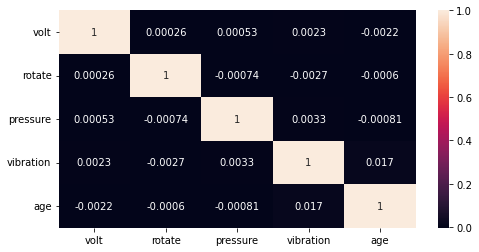

In [69]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),annot= True )
plt.show()

Se puede observar una leve correlacion positiva entre la vibracion y la edad de la maquina. Cosa que tiene sentido debido a que en muchas ocasiones las maquinarias con mayor tiempo de funcionamiento presentan mas desgaste en las piezas moviles las cuales producen mayores vibraciones.

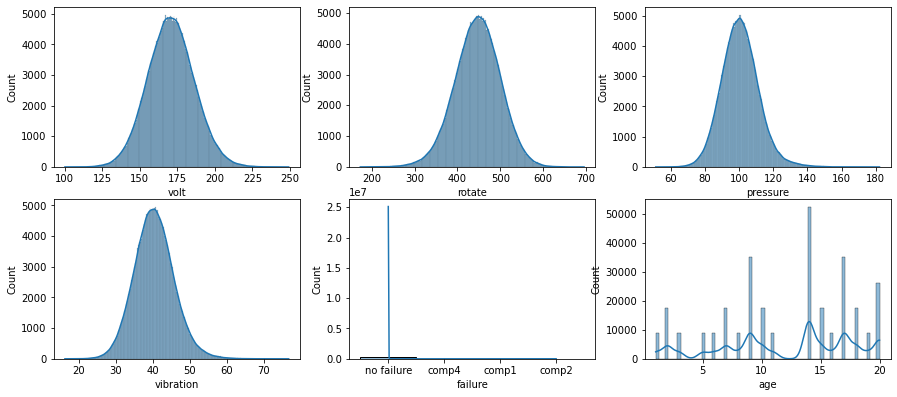

In [48]:
#Graficas de la distribucion de los atributos analizados 
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns, 1):
    plt.subplot(3,3,i)
    sns.histplot(df[col], kde= True)

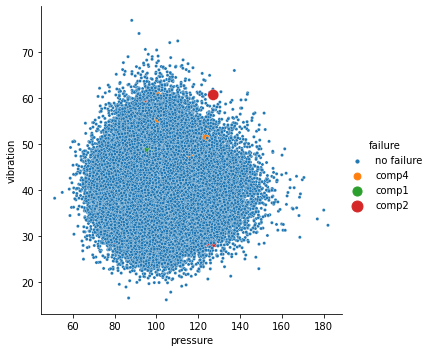

In [166]:
sns.relplot(x='pressure' , y='vibration', hue='failure', size='failure',sizes=(120,10), data= df)

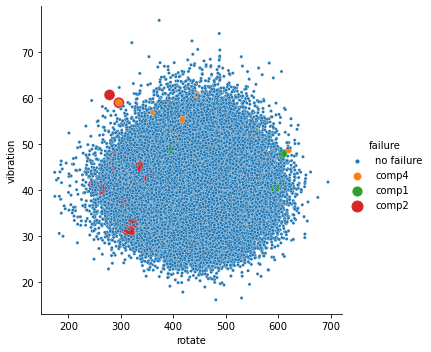

In [167]:
sns.relplot(x='rotate' , y='vibration', hue='failure', size='failure',sizes=(120,10), data= df)

En este grafico se puede observar un dato interesante, y es que en la relacion de la rotacion y la vibracion, las fallas del componente2 ocurren todas cuando los valores de rotacion son menores a 400.

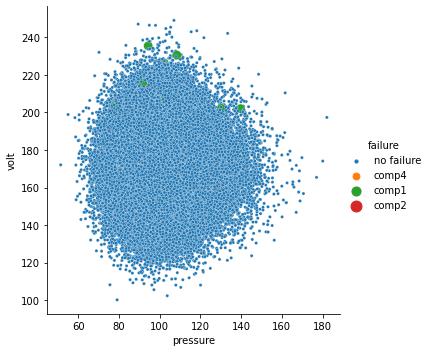

In [168]:
sns.relplot(x='pressure' , y='volt', hue='failure', size='failure',sizes=(120,10), data= df)

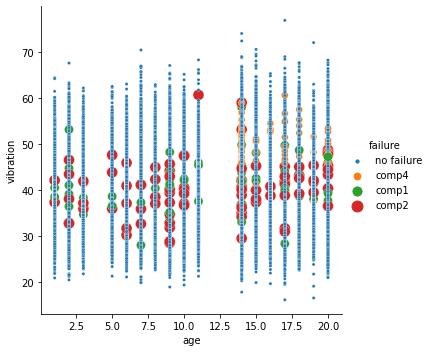

In [51]:
sns.relplot(x='age' , y='vibration', hue='failure', size='failure',sizes=(120,10), data= df)

En esta grafica se puede observar como el comp4 solo presenta fallas en aquellos equipos que tienen las de 13 años de edad. En los equipos jovenes no se presenta la falla de ese componentes para los mismos niveles de vibracion.

In [170]:
# Transformacion de los atributos categoricos en numericos
scaler = LabelEncoder()
df['failure'] = scaler.fit_transform(df['failure'])

In [171]:
df.sample(3)

,volt,rotate,pressure,vibration,failure,Target,age
749105,157.661694,443.303790,110.172441,33.558906,3,0,2
29929,176.062112,447.717306,91.606839,40.766384,3,0,7
393639,151.027694,430.001145,110.559343,48.452319,3,0,14


In [174]:
X = df.drop(columns='failure' , axis=1)
y = df['failure']

### Balanceo de Dataset

Se aplica la tecnica SMOTETomek para balancear el dataset

In [93]:
smote = SMOTETomek(random_state =42)
X1_res , y1_res = smote.fit_resample(X,y)

In [94]:
df_X = pd.DataFrame(X1_res)
df_y = pd.DataFrame(y1_res)

In [95]:
df1 = pd.concat([df_X , df_y] , axis=1)

In [175]:
df1.sample(3)

,volt,rotate,pressure,vibration,age,failure
564403,185.780982,377.226909,106.420200,43.577223,10,0
274872,145.944303,430.548369,108.674384,36.445013,9,3
1083735,180.710259,537.597493,101.744329,49.536131,17,2


In [176]:
# Verificar la aplicacion de la tecnica de balanceo
df1["failure"].value_counts()

3    306423
2    306422
0    306421
1    306420
Name: failure, dtype: int64

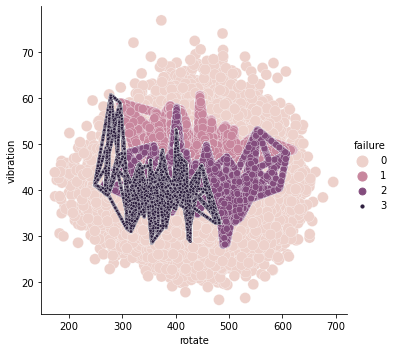

In [52]:
sns.relplot(x='rotate' , y='vibration', hue='failure', size='failure',sizes=(120,10), data= df1)

En esta grafica se puede observar el efecto de la aplicacion de la tecnica de balanceo, en la cual se crearon valores sinteticos de la clase minoritaria (los componentes con fallas)

In [62]:
df1.head(3)

,volt,rotate,pressure,vibration,age,failure
0,176.217853,418.504078,113.077935,45.087686,18,0
1,162.879223,402.747490,95.460525,43.413973,18,0
2,170.989902,527.349825,75.237905,34.178847,18,0


In [101]:
X = df1.drop(columns='failure' , axis=1)
y = df1['failure']

## Validacion del modelo

Para prevenir el overfitting, se aplica la tecnica StratifiedKFold para la validacion de los modelos

In [102]:
skf = StratifiedKFold(n_splits=5 , random_state = None)
for train_index , test_index , in skf.split(X,y):
	X1_train, X1_test = X.iloc[train_index],X.iloc[test_index]
	y1_train, y1_test = y.iloc[train_index],y.iloc[test_index]
	train_0, train_1 = len(y1_train[y1_train==0]),len(y1_train[y1_train==1])
	test_0, test_1 = len(y1_test[y1_test==0]),len(y1_test[y1_test==1])
	print("train: 0=%d , 1=%d , test:0=%d , 1=%d" % (train_0,train_1,test_0,test_1))

train: 0=245136 , 1=245136 , test:0=61285 , 1=61284
train: 0=245137 , 1=245136 , test:0=61284 , 1=61284
train: 0=245137 , 1=245136 , test:0=61284 , 1=61284
train: 0=245137 , 1=245136 , test:0=61284 , 1=61284
train: 0=245137 , 1=245136 , test:0=61284 , 1=61284


## Division del dataset (Train/Test) y Estandarizacion

In [123]:
# Dividir en train/test
X_train , X_test, y_train , y_test = train_test_split(X,y,random_state=42,test_size=0.33,stratify=y)

In [125]:
# Estandarizacion de los parametros 
sc = preprocessing.StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Entrenamiento de los Modelos

### 1. Regresion Logistica

In [126]:

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

Training Accuracy    : 67.92 %
Model Accuracy Score : 67.87 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.65      0.62      0.63    101119
           1       0.70      0.74      0.72    101119
           2       0.80      0.88      0.84    101119
           3       0.54      0.48      0.51    101120

    accuracy                           0.68    404477
   macro avg       0.67      0.68      0.67    404477
weighted avg       0.67      0.68      0.67    404477

--------------------------------------------------------


c:\Users\muril\anaconda3\envs\coderhouse\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


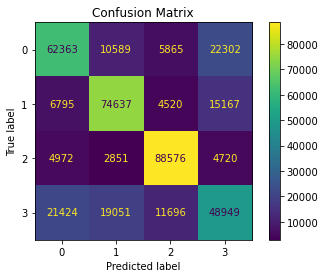

In [127]:
print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(logreg, X_test, y_test);
plt.title('Confusion Matrix');

#### 1.1 Ajuste de Hiperparametros

In [128]:
import warnings
warnings.filterwarnings('ignore')

In [129]:
# Grilla de los parametros para una regresion logistica
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [130]:
logreg2 = LogisticRegression()
clf = GridSearchCV(logreg2,                   # modelo
                   param_grid = parameters,   # hiperparametros
                   scoring='accuracy',        # metrica 
                   cv=10)                     # numero de folds

In [131]:
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [132]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy : 0.6826751790701392


In [133]:
logreg2 = LogisticRegression(C = 0.001, 
                            penalty = 'l2', 
                            solver = 'liblinear')
logreg2.fit(X_train,y_train)
y_pred = logreg2.predict(X_test)
print("Accuracy:",logreg2.score(X_test, y_test))

Accuracy: 0.6824541321261778


Luego del ajuste de los hiperparametros al modelo y el reentreno obtuvimos solo una leve mejora en la precision de las predicciones del modelo. Esta mejora no es significativa comparada con la precision obtenida con otros modelos.

### 2. Decision Tree

In [108]:
# Decision Tree
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

Training Accuracy    : 100.0 %
Model Accuracy Score : 99.53 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    101119
           1       0.99      1.00      1.00    101119
           2       1.00      1.00      1.00    101119
           3       1.00      0.99      0.99    101120

    accuracy                           1.00    404477
   macro avg       1.00      1.00      1.00    404477
weighted avg       1.00      1.00      1.00    404477

--------------------------------------------------------


c:\Users\muril\anaconda3\envs\coderhouse\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


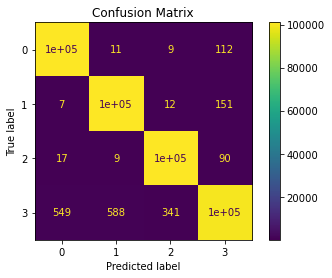

In [109]:
print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(decision, X_test, y_test);
plt.title('Confusion Matrix');

### 3. Random Forest

In [110]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

Training Accuracy    : 100.0 %
Model Accuracy Score : 99.86 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    101119
           1       1.00      1.00      1.00    101119
           2       1.00      1.00      1.00    101119
           3       1.00      0.99      1.00    101120

    accuracy                           1.00    404477
   macro avg       1.00      1.00      1.00    404477
weighted avg       1.00      1.00      1.00    404477

--------------------------------------------------------


c:\Users\muril\anaconda3\envs\coderhouse\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


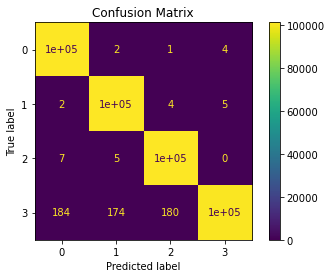

In [111]:
print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(random_forest, X_test, y_test);
plt.title('Confusion Matrix');

## Conclusiones

Al concluir este proyecto de analisis, seleccion, entrenamiento y evaluacion de modelos de machine learning orientados a la prediccion de fallas en eaquipos, se obtuvieron los siguientes insights y conclusiones:

1. Se inicio el trabajo con la idea de realizar una clasificacion binaria pero luego se decidio realizar una clasificacion multivariada porque se considero de importancia conocer con precision cual componente es el que fallara.
2. El metodo de balanceo del dataset puede influir en el overfitting del modelo al crear instancias artificiales.
3. Se probaron 3 modelos de los cuales el que presento un mejor desempeno fue: Random Forest seguido del Decision Tree y el que peor se desempeno para esta tarea en particular de clasificacicon fue la regresion logistica.